# 日夜图像分类器
---

日夜图像数据集由200个RGB彩色图像组成，分为两类：白天图像和夜晚图像。每个例子都有相同的数字：100个日图像和100个夜图像。

我们希望建立一个分类器，可以把这些图像准确地标记为白天或黑夜。要完成这个任务，我们需要找出这两种图像之间的显著性特征！

*注：所有图像都来自 [AMOS 数据集](http://cs.uky.edu/~jacobs/datasets/amos/) （众多户外场景档案）。*


### 导入资源

在开始使用项目代码之前，请导入你需要的库和资源。

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## 训练并测试数据
200张日/夜的图像被分成训练和测试数据集。

* 这些图像中的60％是训练图像，供你在创建分类器时使用。
* 另外40％是测试图像，将用于测试分类器的准确度。

首先，我们设置一些变量来跟踪图像的存储位置：

image_dir_training: the directory where our training image data is stored
image_dir_test: the directory where our test image data is stored

In [3]:
# Image data directories
image_dir_training = "../day_night_images/training/"
image_dir_test = "../day_night_images/test/"

## 加载数据集

前几行代码将加载训练日/夜图像，并将它们全部存储在变量`IMAGE_LIST`中。 该列表包含图像及其相关标签（“日”或“夜”）。

例如， `IMAGE_LIST` 中的第一个图像标签对可以通过索引

In [4]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


---
# 1. 可视化输入图像

Shape: (471, 640, 3)
Label: day


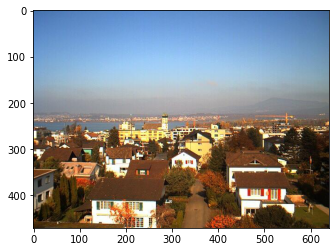

In [5]:
# Print out 1. The shape of the image and 2. The image's label

# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))


# 2. 预处理数据

在每张图像中进行加载之后，你需要可视化输入和输出！


---
### 输入


请使你的图像尺寸保持一致，以便传输至相同的分类步骤！每一张输入图像应拥有相同的格式、尺寸，等等。

#### TODO: 标准化输入图像

* 重新将每张图像调整为要求尺寸: 600x1100px (hxw).

In [15]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image so that all "standard" images are the same size 600x1100 (hxw) 
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im
    

### TODO: 标准化输出

对于每一张加载的图像，你还需要确定预期输出。针对这一点，请使用二进制数值，0/1=夜/日。

In [16]:
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
    ## TODO: complete the code to produce a numerical label

    return 0 if label == "night" else 1


## 构建输入图像和输出标签的`STANDARDIZED_LIST` 函数 

该函数将输入一个图像标签对列表，并输出一个包含调整过的图像和数字标签的**标准**列表。

此处使用你在上方定义的函数来标准化输入和输出，因此，你必须完成那些函数来使这里的标准化顺利进行。

In [17]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## 将标准化数据可视化

显示一个来自STANDARDIZED_LIST的标准化图片。

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


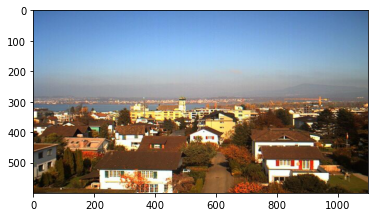

In [18]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))
